# Topics
## Classification of Handwritten Digits Using PCA 


In [2]:
%matplotlib inline

''' Initial Imports'''

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

''' loading handwritten digits: data and targets'''
dig_data = load_digits()
X = dig_data.data

# digits: the values of the digits -- or, "targets", "labels".
digits = dig_data.target

print(type(X), X.dtype, X.shape)
print(type(digits), digits.dtype, digits.shape)


<class 'numpy.ndarray'> float64 (1797, 64)
<class 'numpy.ndarray'> int64 (1797,)


# Classification Scheme

- ## The (partial) PCA representation of the image is given by the $n$ PCA coefficients.


- ## To find out which digit an image represents amounts to finding out which *n*-dimensional cluster does the PCA representation of that image belong.

- ## Therefore, one way to classify is to find the $n$-dimensional _average_ distance between the unknown image and the members of the already classified clusters in PCA space, via the Pythagorean Theorem.  

- ## For example, suppose $c_0$, $c_1$, ..., $c_{n-1}$ are the $n$ PCA coefficients of the unknown image, and $c_{0, i}$, $c_{1, i}$, ..., $c_{(n-1), i}$ are the PCA cofficients of the $i$th member of a cluster.

   ## Then the sum of squared distances between the unknown image and the $i$th member of a cluster can be calculated as follows

   ## $d_i^2 = (c_0 - c_{0, i})^2 + (c1 - c_{1, i})^2 + ... + (c_{n-1} - c_{n-1, i})^2$


## _Using this metric, the unknown image belongs to the cluster to which it has the lowest average distance._  

# This accomplishes the classification.

## Breakout: now let's try this simplest way of classification by calculating the average distance between an unknown handwritten digit to all the images that belong to one digit

In [3]:
'''
Breakout Solution

Note the first 10 images in the data base are simply the ten digits, 0 to 9.

Let's just use them as a trial.  Starting with zero.

Recall: For Xproj, 0th index selects which image, 1st index selects which PCA component.

'''
# project from 64 to n_comp dimensions
n_comp = 10
pca = PCA(n_comp)  
Xproj = pca.fit_transform(X)


# Select a digit image for recognition
select_idx = 0

# idx_compare = digits == 0
idx_compare = digits == 2

Xproj_compare = Xproj[idx_compare, :]
print("There are {:d} images of the selected digit.".format(Xproj_compare.shape[0]))

# initialize the distance (squared) to be 0
metric = 0.
# Going through all the images of the same digit
for i in range(Xproj_compare.shape[0]):
    # Xproj[select_dig] same as Xproj[select_dig, :] 
    # -- that is, all PCA components are included.
    # .sum(): adds up the squares of all the components
    metric += ( (Xproj[select_idx] - Xproj_compare[i])**2).sum()

# for the "right group"
# minus 1 because the "distance" between a digit and itself is 0.
# metric /= (Xproj_compare.shape[0] - 1)

# for the "wrong groups", by unblocking this line above:
# idx_compare = digits == 1
metric /= Xproj_compare.shape[0]

print(metric)

There are 177 images of the selected digit.
2161.95427774


4


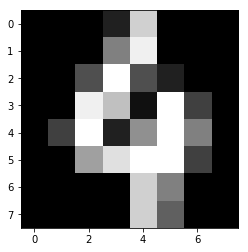

In [4]:
#In general the digit that corresponds to an image can be found as follows.

select_idx = 100
# digits is defined in the first cell 
print(digits[select_idx])
plt.imshow(X[select_idx].reshape(8, -1), cmap = 'gray')

## Breakout: 

## Turn the above into a function, 

## classify_dig(X, select_idx, n_comp = 10, prn_interm_metric = False)

## where 

- ### X is the image data for the digits, 

- ### n_comp specifies the number of PCA components, 

- ### select_idx selects one of the 1797 images and therefore can be anything between 0 and 1796.  

- ### if prn_interm_metric is False, the function should just print the classification result based on PCA and the correct answer.  If it is True, see below.

## This function should 

- ### compare the PCA coefficients of one image, selected by select_idx, with the PCA coefficients of all images in each of the digit groups ("0", "1", ..., "9"); determine to which group the average squared distances is the lowest; and, finally, prints out the digit that this group belongs to.

- ### return k_keep, metric_min, where k_keep is the answer (the digit) found by PCA and metric_min is the minimum distance squared.


## The main program should 

- ### call classify_dig(),

- ### produce an output that, if prn_interm_metric = True, looks something like this, for the case of the selected image being the first "1":

        There are 178 images of the selected digit.
        k, metric: 0 , 2857.876035

        There are 181 images of the selected digit.
        k, metric: 1 , 754.657015021

        There are 177 images of the selected digit.
        k, metric: 2 , 1571.7009927

        There are 183 images of the selected digit.
        k, metric: 3 , 1900.62858131

        There are 181 images of the selected digit.
        k, metric: 4 , 1547.08415651

        There are 182 images of the selected digit.
        k, metric: 5 , 1923.4742909

        There are 181 images of the selected digit.
        k, metric: 6 , 1935.79313827

        There are 179 images of the selected digit.
        k, metric: 7 , 1715.301551

        There are 174 images of the selected digit.
        k, metric: 8 , 1124.21824358

        There are 180 images of the selected digit.
        k, metric: 9 , 2080.11842361

        Correct Answer: 1
        Answer based on PCA space distance: 1 (754.657).

- ### display the image that corresponds to select_idx for human verification. 


In [5]:
def classify_dig(X, select_idx, n_comp = 10, prn_interm_metric = False):
    # project from 64 to n_comp dimensions
    n_comp = 10
    pca = PCA(n_comp)  
    Xproj = pca.fit_transform(X)


    # Select a digit image for recognition
    select_idx = 0

    # idx_compare = digits == 0
    idx_compare = digits == 2

    Xproj_compare = Xproj[idx_compare, :]
    print("There are {:d} images of the selected digit.".format(Xproj_compare.shape[0]))

    # initialize the distance (squared) to be 0
    metric = 0.
    # Going through all the images of the same digit
    for i in range(Xproj_compare.shape[0]):
        # Xproj[select_dig] same as Xproj[select_dig, :] 
        # -- that is, all PCA components are included.
        # .sum(): adds up the squares of all the components
        metric += ( (Xproj[select_idx] - Xproj_compare[i])**2).sum()

    # for the "right group"
    # minus 1 because the "distance" between a digit and itself is 0.
    # metric /= (Xproj_compare.shape[0] - 1)

    # for the "wrong groups", by unblocking this line above:
    # idx_compare = digits == 1
    metric /= Xproj_compare.shape[0]

    print(metric)

## Breakout: Digit recognition success rate estimation -- the "leave one out" test.

## Write a program (no need to write a function) that 

## - First goes through the first 50 images in the data base and determine by using classify_dig(), the percentage of the images that are correctly identified.

## - Next goes through *all* 1797 images in the data base and determine by using classify_dig(), the percentage of the images that are correctly identified.  This is our "leave-one-out" success rate estimation.

## But let's see what went wrong...

(100, 64)


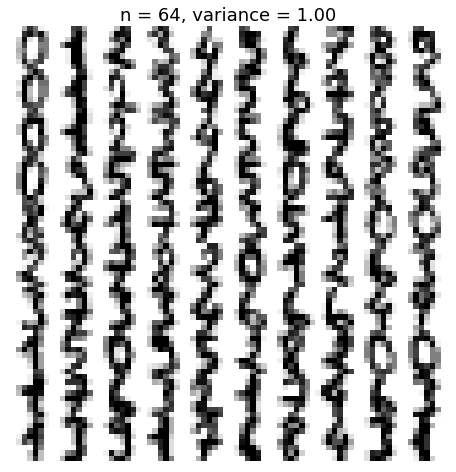

In [18]:
'''
Indeed, with 8 components, the second 9 looks like a 3!  
This problem goes away when you use 20 components.

But other problems don't go away, such as:

- the first '2' being mid-identified as a '8'
- the first '5' being mid-identified as a '9' 


'''
def plot_pca_digits(n_components):

    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    print(Xproj.shape)
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()

    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im, cmap = 'binary')
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    # Not sure what this line does.
    plt.clim(0, 16)
    
# with 8 components, the '9' in the second row looks like 3!
# Even with 64 components, that '9' is still not clear!
plot_pca_digits(n_components= 64)
plt.show()

## Problems and Improvements

- ### Problem 1: Some clusters are smaller than others.  So just because a digit is closer to the center to one cluster doesn't necessarily mean it belongs there.

- ### Improvement 1: draw bounadaries around each cluster -- SVM (next week)

- ### Problem 2: There could be genuine confusion -- as you saw in the output of the cell above

- ### Improvement 2: Build a probabilistic model (usually an n-dimensional Gaussian) based on the distribution of points in each of the (_n_-dimensional) cluster and then assess the probabilities of a handwritten digit belonging to each cluster (by using distances measured in $\sigma$'s instead of absolute distance) -- and you make a decision only if one of the probabilities is much higher than any of the others.  If two probabilities are close to each other, then you present both as possibilities.  Really, this is the right way to classify (that's what a human would do -- "well, this is either a '5' or a '6'."  [Use the 2-D PCA space as an example.]  This is a much more sophisticated approach -- future homework problem??

## If you think face recogntion is easy:

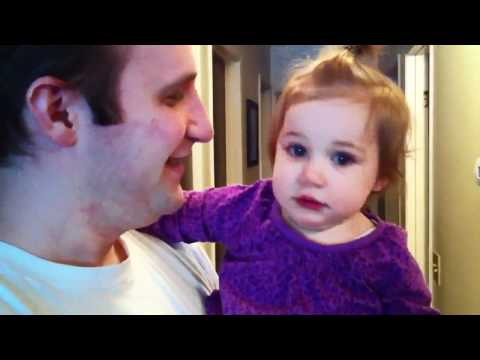

In [11]:
from IPython.display import YouTubeVideo
from IPython.display import display
display(YouTubeVideo('_k0fnTiKEMc'))

## End of Week 14-2